### Image classification using sci-kit learn logistic regression
Type : Multiclass Classification  
Dataset: Fashion-mnist dataset (https://github.com/zalandoresearch/fashion-mnist)  
References: Pluralsight.com

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

from sklearn.linear_model import LogisticRegression

In [7]:
fashion_mnist_df = pd.read_csv("../datasets/fashion-mnist_train.csv")

In [9]:
fashion_mnist_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


The first column is the label and rest of the 784 columns are the pixel intensity values

In [10]:
fashion_mnist_df.shape

(60000, 785)

In [11]:
fashion_mnist_df = fashion_mnist_df.sample(frac=0.3).reset_index(drop=True)

In [12]:
fashion_mnist_df.shape

(18000, 785)

In [13]:
LOOKUP = {0:'Tshirt',
        1:'Trouser',
         2:'Pullover',
         3:'Dress',
         4:'Coat',
         5:'Sandal',
         6:'Shirt',
         7:'Sneaker',
         8:'Bag',
         9:'Ankle boot'}

In [23]:
def display_image(features,actual_label):
    print("Actual label ",LOOKUP[actual_label])
    plt.imshow(features.reshape(28,28))

In [28]:
X = fashion_mnist_df.drop(['label'],axis=1)

In [29]:
Y = fashion_mnist_df["label"]

Actual label  Sneaker


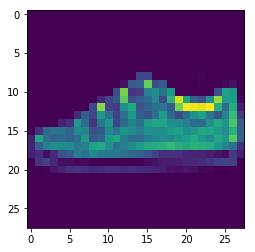

In [34]:
display_image(X.loc[5].values,Y.loc[5])

Lets normalize the values

In [37]:
X = X/255

In [38]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [ ]:
logistic_model = LogisticRegression(solver='sag',max_iter=1000).fit(x_train,y_train)
#sag solves tends to be better with image data and multiclass classification

In [42]:
y_pred = logistic_model.predict(x_test)

In [48]:
print("accuracy score : ", accuracy_score(y_pred,y_test))
print("precision score : ", precision_score(y_pred,y_test,average="weighted"))
print("recall score : ", recall_score(y_pred,y_test,average="weighted"))

accuracy score :  0.8363888888888888
precision score :  0.8411942588214553
recall score :  0.8363888888888888
